### Polynomial Regression

For understanding Polynomial Regression, let's first understand a polynomial.
Merriam-webster defines a polynomial as:
"_A mathematical expression of one or more algebraic terms each of which consists of a constant multiplied by one or more variables raised to a non-negative integral power (such as a + bx + cx^2)"._
Simply said, poly means many. So, a polynomial is an aggregation of many monomials(or Variables).
A simple polynomial equation can be written as:
$$y = {a+bx + cx^2+...+nx^n+...}$$

So, Polynomial Regression can be defined as a mechanism to predict a _dependent variable_ based on the polynomial relationship with the _independent variable_.

 In the equation, _$$y= {a+bx + cx^2+...+nx^n+...}$$_ the maximum power of 'x' is called the degree of the polynomial equation.
 For example, if the degree is 1, the equation becomes $$y={a+bx}$$ which is a simple linear equation.
              if the degree is 2, the equation becomes $$y = {a+bx + cx^2}$$ which is a quadratic equation and so on.

## When to use Polynomial Regression?
Many times we may face a requirement where we have to do a regression, but when we plot a graph between a dependent and independent variables, the graph doesn't turn out to be a linear one.
A linear graph typically looks like:
<img src="LinearGraph.png" width="300">

But what if the relationship looks like:
<img src="PolynomialGraph.png" width="300">

It means that the relationship between X and Y can't be described Linearly.
Then comes the time to use the Polynomial Regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.pyplot inline
# this makes sure that the graphs are printed in the jupyter notebook itself

UsageError: Line magic function `%matplotlib.pyplot` not found.


In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Here, it can be seen that there are 3 columns in the dataset. The problem statement here is to predict the salary based on the Position and Level of the employee. But we may observe that the Position and the level are related or level is one other way of conveying the position of the employee in the company. So, essentially Position and Level are conveying the same kind of information. As Level is a numeric column, let's use that in our Machine Learning Model. Hence, Level is our feature or X variable. And, Salary is Label or the Y variable

In [9]:
x=dataset.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [10]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Generally, we divide our dataset into two parts
1) The training dataset to train our model. And,
2) The test dataset to test our prepared model.
Here, as the dataset has a limited number of entries, we won't do a split.
Instead of that, we'd use direct numerical values to test the model.
Hence, the code above is kept commented.
But, train test split can also be done, if you desire so:)
    
To learn Polynomial Regression, we'd follow a comparative approach.
First, we'll try to create a Linear Model using Linear Regression and then we'd prepare a Polynomial Regression Model and see how do they compare to each other

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

# Visualising the Linear Regression results

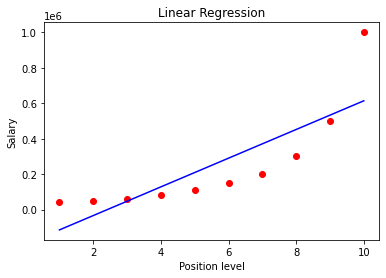

In [13]:
plt.scatter(x, y, color='red')
plt.plot(x,lin_reg.predict(x), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Here, the red dots are the actual data points and, the blue straight line is what our model has created. It is evident from the diagram above that a Linear model does not fit our dataset well. So, let's try with a Polynomial Model.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)
print(X_poly)
poly_reg.fit(X_poly, y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


PolynomialFeatures()

In [16]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

It can be noted here that for Polynomial Regression also, we are using the Linear Regression Object.
###### Why is it so?
It is because the Linear in Linear Regression does not talk about the degree of the Polynomial equation in terms of the dependent variable(x). Instead, it talks about the degree of the coefficients. Mathematically,
$$y = {a+bx + cx^2+...+nx^n+...}$$
It's not talking about the power of x, but the powers of a,b,c etc.
And as the  coefficients are only of degree 1, hence the name Linear Regression.

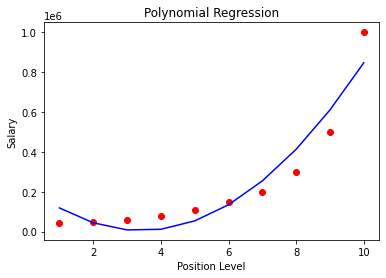

In [18]:
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Still, a two degree equation is also not a good fit. 
Now, we'll try to increase the degree of the equation i.e. we'll try to see that whether we get a good fit at a higher degree or not.
After some hit and trial, we see that the model get's the best fit for a 4th degree polynomial equation.

In [19]:
poly_reg1 = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg1.fit_transform(x)
poly_reg1.fit(X_poly, y)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly1, y)

LinearRegression()

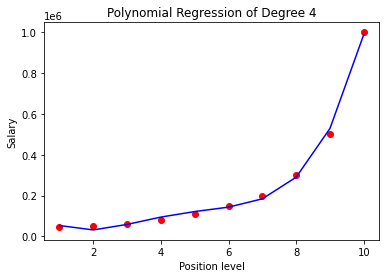

In [20]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Here, we can see that our model now accurately fits the dataset. This kind of a fit might not be the case with the actual business datasets.
we  are getting a brilliant fit as the number of datapoints are a  few.